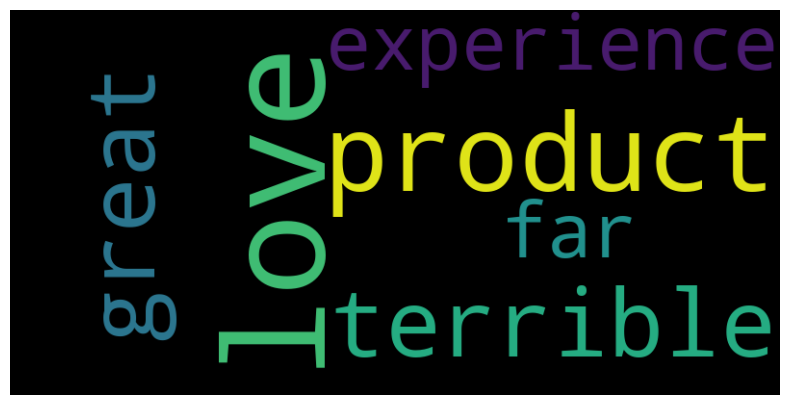

In [81]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample dataframe with text data
df = pd.DataFrame({'text': ['I love this product!', 'This is terrible.', 'Great experience so far.']})

# Tokenize the dataframe
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Concatenate all tokens into a single list
all_tokens = [word for tokens in df['tokens'] for word in tokens]

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(all_tokens))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


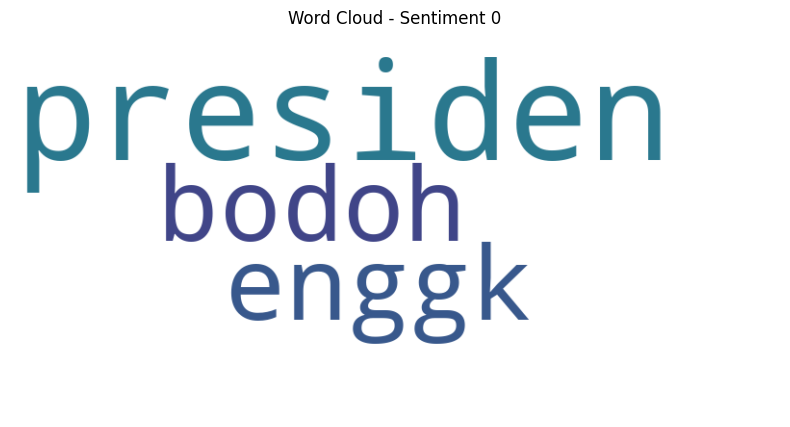

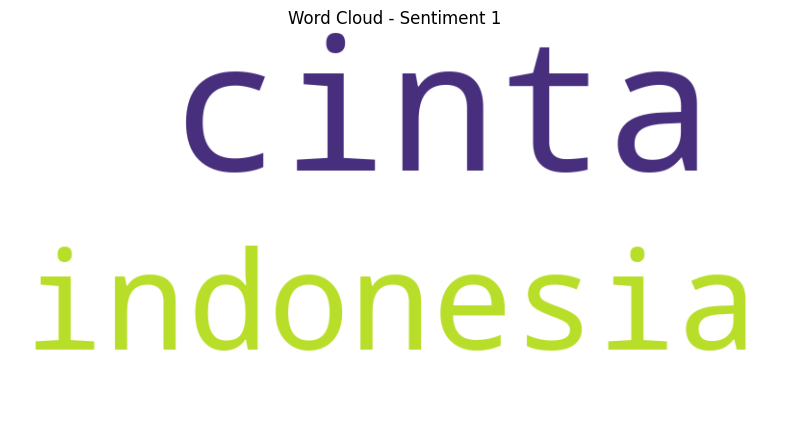

In [82]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample dataframe
data = {'Tweet': ['presiden enggk guna', 'saya cinta indonesia', 'aku cinta kamu', 'presiden bodoh'],
        'Sentiment': [0, 1, 1, 0]}
df = pd.DataFrame(data)

# Tokenize the dataframe
df['tokens'] = df['Tweet'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords
stop_words = set(stopwords.words('indonesian'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Create word clouds based on sentiment categories
sentiment_categories = df['Sentiment'].unique()

for category in sentiment_categories:
    category_tokens = [word for tokens in df[df['Sentiment'] == category]['tokens'] for word in tokens]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(category_tokens))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Sentiment {category}')
    plt.axis('off')
    plt.show()


In [83]:
df['tokens']

0     [presiden, enggk]
1    [cinta, indonesia]
2               [cinta]
3     [presiden, bodoh]
Name: tokens, dtype: object

In [84]:
sentiment_categories

array([0, 1], dtype=int64)

In [85]:
# dataset augmentasi
import numpy as np

acc = [84.31, 83.40, 85.27, 84.30]
pre = [85.18, 86.07, 84.36, 85.23]
rec = [84.25, 85.23, 83.34, 84.26]

# dataset nonaugmentasi
acc_1 = [82.92, 82.50, 83.82, 83.14]
pre_1 = [82.51, 82.03, 83.30, 82.60]
rec_1 = [77.78, 77.24, 79.14, 78.23]


In [86]:
print(f"{np.average(rec):.2f}%")
print(f"{np.std(rec):.2f}%")

84.27%
0.67%


In [87]:
print(f"{np.average(rec_1):.2f}%")
print(f"{np.std(rec_1):.2f}%")

78.10%
0.70%


In [88]:
import numpy as np
import pandas as pd
import xgboost as xgb
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

warnings.simplefilter("ignore")

# Load the pre-trained XGBoost model
# model = joblib.load("model.pkl")


In [89]:
import pandas as pd

# Data tweet dengan sentimen positif
tweet_positif = [
    "PPKM membantu menurunkan angka penyebaran COVID-19.",
    "Terima kasih PPKM karena membuat masyarakat lebih disiplin.",
    "Saya mendukung PPKM demi kesehatan bersama.",
    "Kebijakan PPKM berhasil menekan lonjakan kasus COVID-19.",
    "Dengan PPKM, kesembuhan pasien COVID-19 semakin meningkat.",
    "PPKM membantu mengurangi beban tenaga medis.",
    "Saya merasa lebih aman berkat PPKM.",
    "PPKM adalah langkah bijak pemerintah untuk mengatasi pandemi.",
    "Ketika semua patuh, PPKM pasti akan sukses.",
    "Dukungan saya untuk keberlanjutan PPKM demi keselamatan kita.",
]

# Data tweet dengan sentimen negatif
tweet_negatif = [
    "PPKM membuat ekonomi terpuruk dan sulit bertahan.",
    "Saya merasa frustrasi dengan kebijakan PPKM yang tidak jelas.",
    "Tidak ada perubahan yang signifikan meski PPKM sudah berlangsung lama.",
    "PPKM seharusnya digantikan dengan pendekatan lain yang lebih efektif.",
    "Saya kehilangan pekerjaan akibat PPKM ini.",
    "Kondisi perekonomian semakin memburuk karena PPKM.",
    "PPKM menyebabkan banyak orang kehilangan mata pencaharian.",
    "Tidak adil, PPKM memberatkan rakyat kecil.",
    "Saya merasa terisolasi dan kesepian karena PPKM.",
    "Kebijakan PPKM tidak memperhatikan dampak sosialnya pada masyarakat.",
]

# Menggabungkan data positif dan negatif
tweets = tweet_positif + tweet_negatif
sentiment = [1] * 10 + [0] * 10

# Membuat DataFrame
df = pd.DataFrame({"tweet": tweets, "sentiment": sentiment})

# Menampilkan DataFrame
df.sample(10)


,tweet,sentiment
12,Tidak ada perubahan yang signifikan meski PPKM...,0
10,PPKM membuat ekonomi terpuruk dan sulit bertahan.,0
5,PPKM membantu mengurangi beban tenaga medis.,1
1,Terima kasih PPKM karena membuat masyarakat le...,1
8,"Ketika semua patuh, PPKM pasti akan sukses.",1
7,PPKM adalah langkah bijak pemerintah untuk men...,1
16,PPKM menyebabkan banyak orang kehilangan mata ...,0
15,Kondisi perekonomian semakin memburuk karena P...,0
19,Kebijakan PPKM tidak memperhatikan dampak sosi...,0
17,"Tidak adil, PPKM memberatkan rakyat kecil.",0


### **Preprocessing**

***Case Folding***

In [90]:
# Mengubah semua teks dalam kolom 'tweet' menjadi huruf kecil
df["tweet"] = df["tweet"].str.lower()

# Mencetak hasil dari Case Folding
print("Case Folding Result:")

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan Case Folding
df.head(5)

Case Folding Result:


,tweet,sentiment
0,ppkm membantu menurunkan angka penyebaran covi...,1
1,terima kasih ppkm karena membuat masyarakat le...,1
2,saya mendukung ppkm demi kesehatan bersama.,1
3,kebijakan ppkm berhasil menekan lonjakan kasus...,1
4,"dengan ppkm, kesembuhan pasien covid-19 semaki...",1


***Tokenizing***

In [91]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Mengunduh resource yang diperlukan oleh NLTK (Natural Language Toolkit)
nltk.download("punkt")


[nltk_data] Downloading package punkt to C:\Users\SNOW-
[nltk_data]     WOLF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
def remove_special_char(text):
    # Menghapus karakter khusus seperti tab, baris baru, dan backslash
    text = (
        text.replace("\\t", " ")
        .replace("\\n", " ")
        .replace("\\u", " ")
        .replace("\\", "")
    )
    # Menghapus karakter non-ASCII seperti emotikon
    text = text.encode("ASCII", "replace").decode("ASCII")
    # Menghapus mention, link, dan hashtag
    text = " ".join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # Menghapus URL yang tidak lengkap
    return text.replace("http://", " ").replace("https://", " ")


def remove_number(text):
    # Menghapus angka dari teks
    return re.sub(r"\d+", "", text)


def remove_punctuation(text):
    # Menghapus tanda baca dari teks
    return text.translate(str.maketrans("", "", string.punctuation))


def remove_whitespace(text):
    # Menghapus spasi di awal dan akhir teks
    return text.strip()


def remove_multiple_whitespace(text):
    # Menghapus multiple whitespace menjadi satu spasi
    return re.sub("\s+", " ", text)


def remove_single_char(text):
    # Menghapus kata yang terdiri dari satu karakter saja
    return re.sub(r"\b[a-zA-Z]\b", "", text)


def tokenize(text):
    # Melakukan tokenisasi kata pada teks menggunakan NLTK
    return word_tokenize(text)


In [93]:
# Mengaplikasikan fungsi remove_special_char pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_special_char)

# Mengaplikasikan fungsi remove_number pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_number)

# Mengaplikasikan fungsi remove_punctuation pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_punctuation)

# Mengaplikasikan fungsi remove_whitespace pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_whitespace)

# Mengaplikasikan fungsi remove_multiple_whitespace pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_multiple_whitespace)

# Mengaplikasikan fungsi remove_single_char pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_single_char)

# Mengaplikasikan fungsi tokenize pada kolom 'tweet'
df["tweet"] = df["tweet"].map(tokenize)

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan preprocessing teks
df.head()


,tweet,sentiment
0,"[ppkm, membantu, menurunkan, angka, penyebaran...",1
1,"[terima, kasih, ppkm, karena, membuat, masyara...",1
2,"[saya, mendukung, ppkm, demi, kesehatan, bersama]",1
3,"[kebijakan, ppkm, berhasil, menekan, lonjakan,...",1
4,"[dengan, ppkm, kesembuhan, pasien, covid, sema...",1


***Stopwords Removal***


In [94]:
from nltk.corpus import stopwords

# Mengunduh resource stopwords dari NLTK
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to C:\Users\SNOW-
[nltk_data]     WOLF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membuat instance dari StopWordRemoverFactory
factory = StopWordRemoverFactory()

# Mendapatkan daftar stopwords dari factory
stopwords = factory.get_stop_words()

# Mencetak stopwords yang telah diurutkan secara alfabetis
print(sorted(stopwords))


['ada', 'adalah', 'agak', 'agar', 'akan', 'amat', 'anda', 'antara', 'anu', 'apakah', 'apalagi', 'atau', 'bagaimanapun', 'bagi', 'bahwa', 'begitu', 'belum', 'bisa', 'boleh', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'demi', 'demikian', 'dengan', 'di', 'dia', 'dimana', 'dll', 'dsb', 'dst', 'dua', 'dulunya', 'guna', 'hal', 'hanya', 'harus', 'ia', 'ingin', 'ini', 'itu', 'itulah', 'jika', 'jika', 'juga', 'juga', 'kah', 'kami', 'karena', 'ke', 'kecuali', 'kemana', 'kembali', 'kenapa', 'kepada', 'ketika', 'kita', 'lagi', 'lain', 'maka', 'mari', 'masih', 'melainkan', 'mengapa', 'menurut', 'mereka', 'namun', 'nanti', 'nggak', 'oh', 'ok', 'oleh', 'pada', 'para', 'pasti', 'pula', 'pun', 'saat', 'saja', 'sambil', 'sampai', 'saya', 'sebab', 'sebagai', 'sebelum', 'sebetulnya', 'secara', 'sedangkan', 'seharusnya', 'sehingga', 'sekitar', 'selagi', 'selain', 'sementara', 'sementara', 'seolah', 'seperti', 'seraya', 'serta', 'sesuatu', 'sesudah', 'setelah', 'seterusnya', 'setiap', 'setidakny

In [96]:
def stopwords_removal(words):
    # Menerapkan filter stopwords pada kata-kata dalam teks
    filtered_words = [word for word in words if word not in stopwords]
    return filtered_words


# Mengaplikasikan fungsi stopwords_removal pada kolom 'tweet'
df["tweet"] = df["tweet"].map(stopwords_removal)

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan stopwords removal
df.head()


,tweet,sentiment
0,"[ppkm, membantu, menurunkan, angka, penyebaran...",1
1,"[terima, kasih, ppkm, membuat, masyarakat, leb...",1
2,"[mendukung, ppkm, kesehatan, bersama]",1
3,"[kebijakan, ppkm, berhasil, menekan, lonjakan,...",1
4,"[ppkm, kesembuhan, pasien, covid, semakin, men...",1


***Stemming***

In [97]:
# Melakukan stemming pada dataset untuk mendapatkan kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [98]:
def stemming_words(words):
    # Melakukan stemming pada setiap kata dalam daftar kata
    return [stemmer.stem(word) for word in words]


# Proses stemming
df["tweet"] = df["tweet"].map(stemming_words)


In [99]:
df.head()


,tweet,sentiment
0,"[ppkm, bantu, turun, angka, sebar, covid]",1
1,"[terima, kasih, ppkm, buat, masyarakat, lebih,...",1
2,"[dukung, ppkm, sehat, sama]",1
3,"[bijak, ppkm, hasil, tekan, lonjak, kasus, covid]",1
4,"[ppkm, sembuh, pasien, covid, makin, tingkat]",1


### **Feature Weighting**

In [100]:
# Fungsi untuk menampilkan seluruh data teks pada kolom
def showAll(column):
    for value in column:
        print(value)


# Fungsi untuk menampilkan data pada kategori tertentu saja
def showOneCategory(typeColumn, textColumn, columnType):
    for text, category in zip(textColumn, typeColumn):
        if category == columnType:
            print(text)


# Fungsi untuk memeriksa apakah suatu kata ada dalam array atau tidak (untuk menghindari duplikasi)
def check(array, word):
    return word not in array


# Fungsi untuk menggabungkan semua data hasil pra-pemrosesan menjadi daftar kata tunggal (tanpa duplikasi)
def termMerging(textColumn, termList):
    for text in textColumn:
        for term in text:
            if check(termList, term):
                termList.append(term)


# Fungsi untuk menghitung frekuensi kemunculan setiap kata dalam setiap dokumen
def countTF(textColumn, typeColumn, termList, TFList):
    for text, category in zip(textColumn, typeColumn):
        docList = [text.count(term) for term in termList]
        docList.append(category)
        TFList.append(docList)


# Fungsi untuk mengubah nilai yang lebih besar dari 1 menjadi 1 (untuk perhitungan DF)
def changeValue(TFList, prepareDFList):
    for doc in TFList:
        dataList = [min(term, 1) for term in doc[:-1]]
        prepareDFList.append(dataList)


# Fungsi untuk menghitung dalam berapa banyak dokumen suatu kata muncul (DF)
def countDF(TFList, DFList):
    for term in zip(*TFList):
        DFList.append(sum(term))


In [101]:
term = []
# Membuat list kosong untuk menyimpan semua term

termMerging(termList=term, textColumn=df["tweet"])
# Memanggil fungsi `termMerging` dengan parameter `termList` yang merupakan list kosong yang akan diisi dengan semua term
# Parameter `textColumn` adalah kolom "tweet" dari dataframe `df`
# Fungsi `termMerging` akan menggabungkan semua term dari kolom "tweet" ke dalam list `term` tanpa adanya term yang berulang


In [102]:
term_frequency = []
# Membuat list kosong untuk menyimpan frekuensi term dalam setiap dokumen

countTF(df["tweet"], df["sentiment"], term, term_frequency)
# Memanggil fungsi `countTF` dengan parameter sebagai berikut:
# - `textColumn`: kolom "tweet" dari dataframe `df` yang berisi teks dalam setiap dokumen
# - `typeColumn`: kolom "sentiment" dari dataframe `df` yang berisi label sentimen untuk setiap dokumen
# - `termList`: list yang berisi semua term yang telah dihasilkan sebelumnya
# - `TFList`: list yang akan diisi dengan frekuensi term dalam setiap dokumen dan label sentimennya

print(len(term_frequency))
# Menampilkan panjang dari list `term_frequency`, yang mengindikasikan jumlah dokumen yang diproses


20


In [103]:
tf_forDF = []
# Membuat list kosong untuk menyimpan frekuensi term dalam setiap dokumen dengan nilai yang telah diubah

changeValue(term_frequency, tf_forDF)
# Memanggil fungsi `changeValue` dengan parameter sebagai berikut:
# - `TFList`: list `term_frequency` yang berisi frekuensi term dalam setiap dokumen dan label sentimennya
# - `prepareDFList`: list yang akan diisi dengan frekuensi term dalam setiap dokumen dengan nilai yang telah diubah

print(len(tf_forDF))
# Menampilkan panjang dari list `tf_forDF`, yang mengindikasikan jumlah dokumen yang diproses setelah nilai yang lebih besar dari 1 diubah menjadi 1


20


In [104]:
document_frequency = []
# Membuat list kosong untuk menyimpan frekuensi kemunculan setiap term dalam dokumen

countDF(tf_forDF, document_frequency)
# Memanggil fungsi `countDF` dengan parameter sebagai berikut:
# - `TFList`: list `tf_forDF` yang berisi frekuensi term dalam setiap dokumen dengan nilai yang telah diubah
# - `DFList`: list yang akan diisi dengan frekuensi kemunculan setiap term dalam dokumen

print(len(document_frequency))
# Menampilkan panjang dari list `document_frequency`, yang mengindikasikan jumlah term yang muncul dalam dokumen


73


In [105]:
# method to count TF in each document category
def count_tf_category(dataTableCategory, termList, textColumn):
    tf_spam_list = []
    for i in range(len(dataTableCategory)):
        doclist = []
        for j in termList:
            count = 0
            for k in range(len(textColumn[i])):
                if j == textColumn[i][k]:
                    count += 1
            doclist.append(count)
        doclist.append(dataTableCategory["sentiment"][i])
        tf_spam_list.append(doclist)
    return tf_spam_list


In [106]:
# splitting tweets that only contain positive sentiment
df_positive = df[df["sentiment"] != 0].reset_index(drop=True)
df_positive.head()


,tweet,sentiment
0,"[ppkm, bantu, turun, angka, sebar, covid]",1
1,"[terima, kasih, ppkm, buat, masyarakat, lebih,...",1
2,"[dukung, ppkm, sehat, sama]",1
3,"[bijak, ppkm, hasil, tekan, lonjak, kasus, covid]",1
4,"[ppkm, sembuh, pasien, covid, makin, tingkat]",1


In [107]:
# splitting tweets that only contain negative sentiment
df_negative = df[df["sentiment"] != 1].reset_index(drop=True)
df_negative.head()


,tweet,sentiment
0,"[ppkm, buat, ekonomi, puruk, sulit, tahan]",0
1,"[rasa, frustrasi, bijak, ppkm, jelas]",0
2,"[ubah, signifikan, meski, ppkm, langsung, lama]",0
3,"[ppkm, ganti, dekat, lebih, efektif]",0
4,"[hilang, kerja, akibat, ppkm]",0


In [108]:
# count tf value in tweets with positive sentiment
tf_positive_rf = count_tf_category(df_positive, term, df_positive["tweet"])
print(len(tf_positive_rf))


10


In [109]:
# count tf value in tweets with negative sentiment
tf_negative_rf = count_tf_category(df_negative, term, df_negative["tweet"])
print(len(tf_negative_rf))


10


In [110]:
tf_positive_df = []
changeValue(tf_positive_rf, tf_positive_df)
print(len(tf_positive_df))


10


In [111]:
tf_negative_df = []
changeValue(tf_negative_rf, tf_negative_df)
print(len(tf_negative_df))


10


In [112]:
nij = []
countDF(tf_positive_df, nij)
print(len(nij))


73


In [113]:
nij_aksen = []
countDF(tf_negative_df, nij_aksen)
print(len(nij_aksen))


73


In [114]:
# determining the maximum value between 1 and the value of nij accent
max_numerator = []
for i in range(len(nij_aksen)):
    temp = 0
    temp = max(1, nij_aksen[i])
    max_numerator.append(temp)
print(max_numerator)


[10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [115]:
import math

# find rf value
rf_list = []
for i in range(len(nij)):
    temp = 0
    temp = math.log10(2 + (nij[i] / max_numerator[i]))
    temp = round(temp, 5)
    rf_list.append(temp)
print(rf_list)


[0.47712, 0.60206, 0.47712, 0.47712, 0.47712, 0.69897, 0.47712, 0.47712, 0.47712, 0.47712, 0.60206, 0.47712, 0.60206, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.39794, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.47712, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103, 0.30103]


In [116]:
# Combining the values of TF for spam and non-spam.
tf_forRF = []

for i in range(len(tf_positive_rf)):
    tf_forRF.append(tf_positive_rf[i])

for i in range(len(tf_negative_rf)):
    tf_forRF.append(tf_negative_rf[i])

print(len(tf_forRF))


20


In [117]:
tf_rf = []
for i in range(len(tf_forRF)):
    doclist = []
    for j in range(len(tf_forRF[0])):
        if j == len(tf_forRF[0]) - 1:
            temp = tf_forRF[i][j]
            doclist.append(temp)
        else:
            temp = rf_list[j] * tf_forRF[i][j]
            doclist.append(temp)
    tf_rf.append(doclist)
print(len(tf_rf))


20


In [118]:
columnName = term
columnName.append('sentiment')

In [138]:
data = pd.DataFrame(tf_rf, columns=columnName)
model.feature_names_in_

AttributeError: `feature_names_in_` is defined only when `X` has feature names that are all strings.

***fixing***

In [144]:
model.feature_names_in_

AttributeError: `feature_names_in_` is defined only when `X` has feature names that are all strings.

## **Test**

In [139]:
model = joblib.load("model.pkl")

In [140]:
new_x_test = data.drop("sentiment", axis=1)
new_y_test = data["sentiment"]


In [141]:
new_x_test = new_x_test.values
new_y_test = new_y_test.values

In [142]:
new_x_test


array([[0.47712, 0.60206, 0.47712, ..., 0.     , 0.     , 0.     ],
       [0.47712, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.47712, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.47712, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.47712, 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.47712, 0.     , 0.     , ..., 0.30103, 0.30103, 0.30103]])

In [134]:
new_y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [143]:
model.predict(new_x_test)

ValueError: Feature shape mismatch, expected: 14651, got 73

In [ ]:
# Preprocess the new data
vectorizer = TfidfVectorizer()
new_X = vectorizer.transform(new_data["text"])
new_X = new_X.toarray()

dtest = xgb.DMatrix(new_X)
predictions = model.predict(dtest)

sentiments = ["Negative", "Neutral", "Positive"]

for i, prediction in enumerate(predictions):
    sentiment = sentiments[np.argmax(prediction)]
    print("Tweet:", new_data["text"][i])
    print("Sentiment:", sentiment)
    print()